# Error Corr

In [1]:
# 2022_01_20 기준 Python 3.10에는 tensorflow가 지원이 안된다.
!python --version

Python 3.7.6


In [2]:
# 필요한 라이브러리
'''
!pip install autograd
!pip install matplotlib
!pip install tensorflow
'''

'\n!pip install autograd\n!pip install matplotlib\n!pip install tensorflow\n'

import

In [3]:
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr
from autograd.core import primitive
from matplotlib import pyplot as plt
%matplotlib inline

using GPU

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.python.client import device_lib 
device_lib.list_local_devices() 
tf.test.is_gpu_available()
# gpu를 사용하려면 cmd와 jupyter notebook cell에서 모두 True값이 나와야 함

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

Parameter

In [5]:
x_max = 1             # 최대 x 범위 : 0 <= x < x_max
w_number = 6          # w 개수
cost_limit = 0.1      # 최소 cost 
step_number = 30000   # step 횟수

Function :
$$y = 1+ w_{1}x + w_{2}x^{2} + ... + w_{6}x^{6}$$
$$y' = w_{1} + 2w_{2}x + ... + 6w_{6}x^{5}$$

Neural Network : $$ye = 1 + xN$$
$$ye' = \frac{ N + N'x }{ \Big\lVert y - y' \Big\rVert^{2} }$$

Cost : $$\sum_{ i=0 }^{ n } { \frac{ (ye' - ye)^{2} }{ n } } + \sum_{ i=0 }^{ n } { \frac{ (y' - y)^{2} }{ n } }$$

In [6]:
# 예측에 넣을 함수.
# def f(x, y):          # f(x, y)
#   return 2*y

# 정답이 되는 함수.
def anal(x):
  return np.exp(list(2*np.array(x)))

# 함수 정의
def Error_Corr(x_max = 1, w_number = 6, cost_limt = 0.1, step_number = 30000):
  def sigmoid(x):
      return 1 / (1 + tf.math.exp(-x))

  def sigmoid_grad(x):
      return sigmoid(x) * (1 - sigmoid(x))

  def neural_network(W, x):
      a1 = sigmoid(tf.tensordot(x, W[0], axes = 1))
      return tf.tensordot(a1, W[1], axes = 1)

  def d_neural_network_dx(W, x, k=1):
      return tf.tensordot(tf.transpose(W[1]), tf.transpose(W[0])**k, axes = 1) * sigmoid_grad(x)

  x = tf.Variable(np.array([[i/100] for i in range(0, x_max * 100, 1)], dtype = np.float32))
  W = [tf.Variable(tf.random_normal([1, 10])), tf.Variable(tf.random_normal([10, 1]))]
  for i in range(1, w_number + 1):
      # 수정
      # globals()['w{}'.format(i)] = tf.Variable(tf.random_normal([1]), name = 'weight{}'.format(i))
      globals()['w{}'.format(i)] = tf.Variable(np.array([[0.5]], dtype = np.float32), name = 'weight{}'.format(i))
  y = 1
  yprime = 0

  sess = tf.Session()
  init = tf.global_variables_initializer()
  sess.run(init)

  for i in range(1, w_number + 1):
      y += globals()['w{}'.format(i)]*(x**i)  # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4) + w5*(x**5) + w6*(x**6)
      yprime += i*globals()['w{}'.format(i)]*(x**(i-1))  # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3) + 5*w5*(x**4) + 6*w6*(x**5)

  # 수정
  ye = 0
  yeprime = 0
  # ye = (x**(w_number + 1)) * neural_network(W, x)
  # yeprime = (w_number + 1) * (x**(w_number))*neural_network(W, x) + (x**(w_number + 1)) * d_neural_network_dx(W, x)

  # Cost 계산
  # 수정
  # cost = tf.reduce_mean(tf.square(yeprime - 2*ye)) + tf.reduce_mean(tf.square(yprime - 2*y))
  cost = tf.reduce_mean(tf.square(yprime - 2*y))
  # Optimizer 함수
  optimizer = tf.train.GradientDescentOptimizer(learning_rate = 2e-5)
  # 0에 수렴하는 Cost 값을 찾아 변수 수정
  train = optimizer.minimize(cost)

  count = 0
  cost_val = 1
  # cost_val값이 cost_limt 값에 도달할 때 까지 반복.
  while cost_val > cost_limt:
    global x_space
    global y_space
    global ye_space
    global corr_space
    global cost_space

    x_space = []
    y_space = []
    ye_space = []
    corr_space = []
    cost_space = []

    # 중간 출력 과정.
    if count % 1 == 0:
      print("count: ", count)
    for step in range(step_number + 1):
      for i in range(1, w_number + 1):
          globals()['w{}_val'.format(i)] = sess.run([globals()['w{}'.format(i)]])
      # 수정
      # cost_val, yeprime_val, ye_val, yprime_val, y_val, x_val, _ = sess.run([cost, yeprime, ye, yprime, y, x, train])
      cost_val, yprime_val, y_val, x_val, _ = sess.run([cost, yprime, y, x, train])
      if count % 1 == 0:
        if step % int(step_number / 2) == 0:
            print('step: ', step, ", Cost: ", cost_val, "\n")
    if count % 1 == 0:
      print("\n")

    count += 1

    # 결과를 담을 List
    x_space += list(x_val)
    # 수정
    # corr_space += list(ye_val + y_val)
    y_space += list(y_val)
    # ye_space += list(ye_val)

    # final_sol = ye + f(x, y)
    # anal_sol = anal(x)
    # error = abs(final_sol - anal_sol)
    # print(np.linalg.norm)

    # 결과 출력
    # 수정
    # plt.plot(x_space, corr_space, '.', label = 'ye + f(x,y)')
    plt.plot(x_space, y_space, '.', label = 'f(x,y)')
    # plt.plot(x_space, ye_space, '.', label = 'ye')
    plt.plot(x_space, anal(x_space), '.', label = 'exp')
    plt.legend()
    plt.show()

  sess.close()

count:  0
step:  0 , Cost:  1.5257964 

step:  2500 , Cost:  1.2966429 

step:  5000 , Cost:  1.1767043 





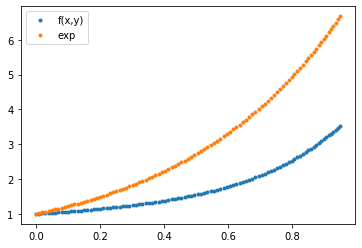

count:  1
step:  0 , Cost:  1.1766663 

step:  2500 , Cost:  1.0944009 

step:  5000 , Cost:  1.0283835 





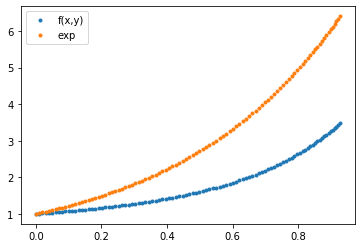

count:  2
step:  0 , Cost:  1.0283592 

step:  2500 , Cost:  0.97090364 

step:  5000 , Cost:  0.918905 





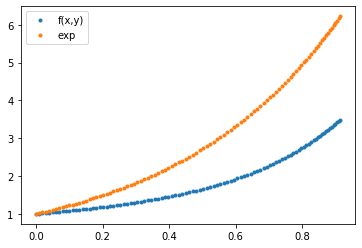

count:  3
step:  0 , Cost:  0.91888505 

step:  2500 , Cost:  0.8709052 

step:  5000 , Cost:  0.8261876 





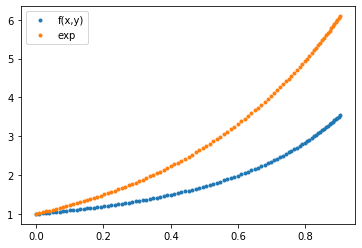

In [7]:
x_max = 1             # 최대 x 범위 : 0 <= x < x_max
w_number = 6          # w 개수
cost_limit = 0.9      # 최소 cost 
step_number = 5000    # step 횟수 -> 총 step 횟수 = count * step

# def f(x, y):          # f(x, y)
#   return 2*y

def anal(x):
  return np.exp(list(2*np.array(x)))

Error_Corr(x_max, w_number, cost_limit, step_number)

ValueError: x and y must have same first dimension, but have shapes (100, 1) and (0,)

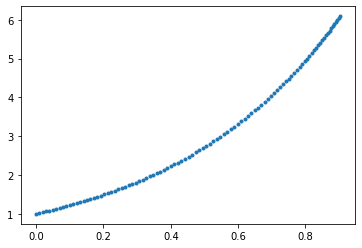

In [8]:
error = [abs(a - b) for a, b in zip(corr_space, anal(x_space))]
plt.plot(x_space, anal(x_space), '.', label = 'anal sol')
plt.plot(x_space, corr_space, '.', label = 'final sol')
plt.plot(x_space, error, '.', label = 'error')
plt.legend()
plt.show()
print(np.linalg.norm(error))